## What I Find
I use the groupby and mean filter to get the mean attendance count for the communities  in the neighborhoods per neighborhood. I then only print the top 3 so that I have a clear understanding of the best neighborhoods.

In [17]:
import pandas as pd
import geopandas
%matplotlib inline

In [18]:
# import dataset
cca = pd.read_csv("NBCT.csv")
#### filter to important info
best = cca.groupby("neighborhood").mean()['attendance_count']
best.sort_values(ascending=False).head(3)

neighborhood
Highland Park          263.000000
Squirrel Hill South    146.000000
Greenfield              72.583813
Name: attendance_count, dtype: float64

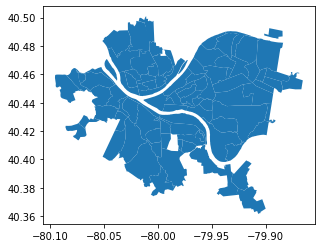

In [19]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

In [22]:
# do the merge
NBCT_map = neighborhoods.merge(cca, how='left', left_on='hood', right_on='neighborhood')
# look at the head to confirm it merged correctly
NBCT_map[['hood','attendance_count','geometry']].head()

,hood,attendance_count,geometry
0,Central Oakland,NaN,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,NaN,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,NaN,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,NaN,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,NaN,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


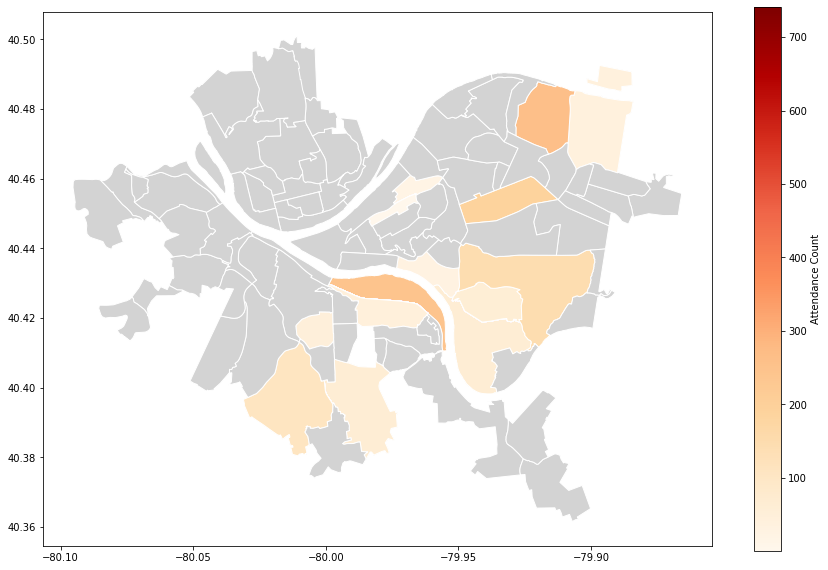

In [29]:
NBCT_map.plot(column='attendance_count', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="blue",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Attendance Count"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )